In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')


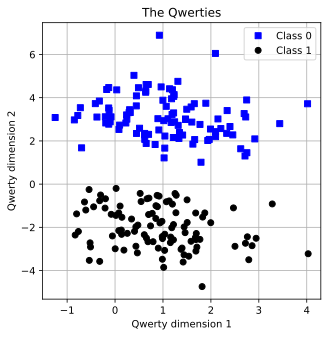

In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# ক্লাস্টার সংখ্যা ও blur
nPerClust = 100
blur = 1

# দুইটি ক্লাস্টারের কেন্দ্র
A = [1, 3]
B = [1, -2]

# ডেটা তৈরি
a = [A[0] + np.random.randn(nPerClust) * blur, A[1] + np.random.randn(nPerClust) * blur]
b = [B[0] + np.random.randn(nPerClust) * blur, B[1] + np.random.randn(nPerClust) * blur]

# লেবেল
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

# ডেটা একত্র করে (200 x 2 shape)
data_np = np.hstack((a, b)).T

# PyTorch tensor-এ রূপান্তর
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# ভিজুয়ালাইজেশন
fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], 'bs', label='Class 0')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], 'ko', label='Class 1')
plt.title('The Qwerties')
plt.xlabel('Qwerty dimension 1')
plt.ylabel('Qwerty dimension 2')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import torch
import torch.nn as nn

def createANNmodel(learningrate):
    # 🔸 Model Architecture:
    # Input: 2D feature → Hidden: 1 → Output: 1 (binary classification)
    ANNclassify = nn.Sequential(
        nn.Linear(2, 16),     # 2 input → 1 hidden
        #nn.ReLU(),           # Activation (not needed here for final layer)
        nn.Linear(16, 1),
        nn.Linear(1, 1),
        nn.Sigmoid()       # Hidden → Output
    )

    # 🔸 Binary classification loss with raw logits
    lossfun = nn.BCEWithLogitsLoss()

    # 🔸 Optimizer: Stochastic Gradient Descent
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningrate)

    return ANNclassify, lossfun, optimizer


In [8]:
def trainTheModel(ANNmodel, data, labels, lossfun, optimizer, numepochs=1000):
    # Initialize losses
    losses = torch.zeros(numepochs)

    for epochi in range(numepochs):
        # Forward propagation
        yHat = ANNmodel(data)

        # Compute the loss
        loss = lossfun(yHat, labels)
        losses[epochi] = loss.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Final prediction after training
    predictions = ANNmodel(data)
    
    #  Apply Sigmoid before thresholding (because using BCEWithLogitsLoss)
    pred_labels = torch.sigmoid(predictions) > 0.5
    
    # Accuracy calculation
    totalacc = 100 * torch.mean((pred_labels == labels).float())

    return losses, predictions, totalacc


Final accuracy: 50%


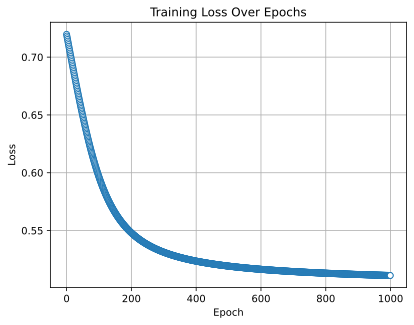

In [11]:
# Create everything
ANNclassify, lossfun, optimizer = createANNmodel(.01)

# Train the model with required arguments
losses, predictions, totalacc = trainTheModel(ANNclassify, data, labels, lossfun, optimizer)

# Report accuracy
print('Final accuracy: %g%%' % totalacc)

# Plot the loss over epochs
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()


In [16]:
def trainTheModel(ANNmodel, data, labels, lossfun, optimizer, numepochs=1000):
    losses = torch.zeros(numepochs)
    for epochi in range(numepochs):
        yHat = ANNmodel(data)
        loss = lossfun(yHat, labels)
        losses[epochi] = loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epochi % 100 == 0:   # প্রতি 100 epoch এ দেখাবে
            with torch.no_grad():
                preds = (ANNmodel(data) > 0.5).float()
                acc = 100 * torch.mean((preds == labels).float())
            print(f"Epoch {epochi}, Loss: {loss.item():.4f}, Accuracy: {acc:.2f}%")

    predictions = ANNmodel(data)
    totalacc = 100 * torch.mean(((predictions > 0.5) == labels).float())
    return losses, predictions, totalacc
accByLR = []
allLosses = np.zeros((len(learningrates), numepochs))

for i, lr in enumerate(learningrates):
    ANNclassify, lossfun, optimizer = createANNmodel(lr)
    losses, predictions, totalacc = trainTheModel(ANNclassify, data, labels, lossfun, optimizer, numepochs)
    accByLR.append(totalacc)
    allLosses[i, :] = losses.detach()



Epoch 0, Loss: 0.7139, Accuracy: 50.00%
Epoch 100, Loss: 0.7135, Accuracy: 50.00%
Epoch 200, Loss: 0.7132, Accuracy: 50.00%
Epoch 300, Loss: 0.7128, Accuracy: 50.00%
Epoch 400, Loss: 0.7125, Accuracy: 50.00%
Epoch 500, Loss: 0.7121, Accuracy: 50.00%
Epoch 600, Loss: 0.7118, Accuracy: 50.00%
Epoch 700, Loss: 0.7114, Accuracy: 50.00%
Epoch 800, Loss: 0.7110, Accuracy: 50.00%
Epoch 900, Loss: 0.7106, Accuracy: 50.00%
Epoch 0, Loss: 0.7410, Accuracy: 50.00%


C:\Users\roger\AppData\Local\Temp\ipykernel_18576\3729924770.py:28: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allLosses[i, :] = losses.detach()


Epoch 100, Loss: 0.7390, Accuracy: 50.00%
Epoch 200, Loss: 0.7362, Accuracy: 50.00%
Epoch 300, Loss: 0.7325, Accuracy: 50.00%
Epoch 400, Loss: 0.7272, Accuracy: 50.00%
Epoch 500, Loss: 0.7197, Accuracy: 50.00%
Epoch 600, Loss: 0.7089, Accuracy: 55.00%
Epoch 700, Loss: 0.6937, Accuracy: 85.50%
Epoch 800, Loss: 0.6733, Accuracy: 98.50%
Epoch 900, Loss: 0.6486, Accuracy: 100.00%
Epoch 0, Loss: 0.8052, Accuracy: 16.50%
Epoch 100, Loss: 0.6931, Accuracy: 50.00%
Epoch 200, Loss: 0.6335, Accuracy: 56.50%
Epoch 300, Loss: 0.5951, Accuracy: 81.00%
Epoch 400, Loss: 0.5702, Accuracy: 87.50%
Epoch 500, Loss: 0.5545, Accuracy: 92.50%
Epoch 600, Loss: 0.5443, Accuracy: 94.00%
Epoch 700, Loss: 0.5372, Accuracy: 97.50%
Epoch 800, Loss: 0.5321, Accuracy: 98.00%
Epoch 900, Loss: 0.5283, Accuracy: 98.50%
Epoch 0, Loss: 0.7546, Accuracy: 50.00%
Epoch 100, Loss: 0.7404, Accuracy: 50.00%
Epoch 200, Loss: 0.7270, Accuracy: 50.00%
Epoch 300, Loss: 0.7050, Accuracy: 73.00%
Epoch 400, Loss: 0.6631, Accuracy: 10

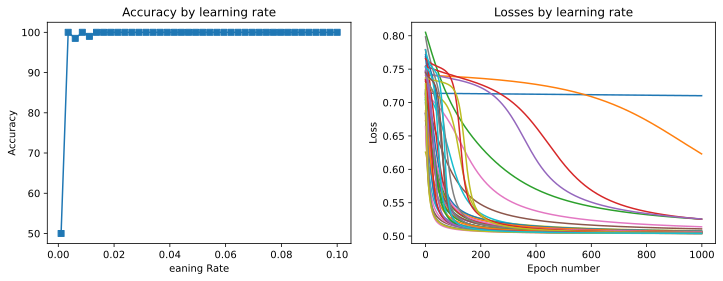

In [17]:
##plot the results
fig,ax=plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('eaning Rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
ax[1].set_title('Losses by learning rate')
plt.show()

In [18]:
##proportion of runs where the model had at least 70% accuracy
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.9750)